In [67]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pywren
%matplotlib inline

# PART 1: SINGLE LANE TRAFFIC MODEL

class TrafficSimulation(object):
    
    def __init__(self, road_length, traffic_density, maximum_velocity, prob_slow_down, tracking = False):
        
        ##SECTION 1: Initialize the road, given the parameters, and create a
        ## road of the desired length and with a random arrangment of cars
        
        self.road_length = road_length
        self.traffic_density = traffic_density
        self.maximum_velocity = maximum_velocity
        self.prob_slow_down = prob_slow_down
        self.tracking = tracking
        self.tracking_counter = 0

        array = [-1]*self.road_length
        indexes = []
        ## Next, choose the indexes where cars will be
        
        # Its pointless to run a traffic simulator
        # with one car, so it reruns the initialization until at least 2
        # cars are present
        counter = 0
        while len(indexes)<2:
            if counter < 100:
                #This loop goes through all positions and decides (based on traffic density) 
                #if there should be a car there
                for x in range(self.road_length):
                    if random.random() < self.traffic_density: 
                         indexes.append(x)
                counter +=1
            else:
                raise RuntimeError('Traffic density too low to execute meaningful simulation. Please increase it slightly.')
        # Set the velocity to 0 for all cars
        for index in indexes:
            array[index] = 0
        self.state = np.array(array)
        
    def tracking_counter_plus_one(self):
        self.tracking_counter +=1
    
    def return_tracking_counter(self):
        return self.tracking_counter
                
    def update(self):
        # output an array of positions where element is not -1, in order to
        # find the places where cars are
        cars = np.where(self.state != -1)
        # only use relevant output from np.where above
        cars = cars[0]
        # create an array which has the position and state
        # of each car and its velocity to be used for moving the cars
        movement_array = np.array([[x, self.state[x]] for x in cars])
        
        for x in range(len(cars)):
            car_index = cars[x]
            #find the distance to next car
            distance = (cars[(x+1)%len(cars)] - car_index) %self.road_length
            
            #accelerate 
            if self.state[car_index] < self.maximum_velocity and distance > self.state[car_index]+1:
                movement_array[x][1] += 1
            #slow down
            elif self.state[car_index] >= distance :
                movement_array[x][1] = distance-1
            #random slow down
            if random.random() < self.prob_slow_down:
                ## note this references movement array not the current 
                ## state so cars don't disapear
                if movement_array[x][1] > 0:
                    movement_array[x][1] -= 1
                    
        #Update: All cars are moved to there respective positions with their respective velocities        
        transition_array = [-1]*self.road_length
        for x in movement_array:
            transition_array[(x[0]+x[1])%self.road_length] = x[1]
            self.state = np.array(transition_array)
        #Track Traffic Flow: all cars that move through the last cell in one interation
        if self.tracking:
            self.tracking_counter = 0
            for x in movement_array:
                if x[0] + x[1] >= self.road_length:
                    self.tracking_counter_plus_one()
                
        
    #Displays the state  
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))

In [33]:
def display_model(density):
    
    #Create a model, and update it 1000 times to get the model to a normal state
    model = TrafficSimulation(100,density,5,0.5)
    for _ in list(range(1000)):
        model.update()

    #Update the model 100 times, displaying after each step
    counter = 0
    model.display()
    while counter < 25:
        model.update()
        model.display()
        counter += 1 

In [36]:
#Figure 1: Desnsity = 0.1
display_model(0.1)

................5..........4....................5.......4..............5.......5.................4..
.4..................4...........5...................4.......4..............4........5...............
.....4..................4...........4...................4........5..............5........5..........
.........4...................5...........5...................5........5..............5........5.....
.............4....................5...........5...................5.......4...............5........5
....5............4....................4............5...................5......4...............4.....
.........5...........4.....................5............5...................5.....4...............4.
..4...........5...........5....................4.............5..................4.....4.............
.......5...........5...........5...................4..............5..................5.....5........
............5..........4...........4...................4..............4..................4.

In [39]:
#Figure 2: Desnsity = 0.3
display_model(0.3)

.1....0.1..1....2............1.0.1000000.1...............1.0.10000...00....2....0000.1......2....0.1
1..2...1..2.1.....2...........1.1000000.1..2..............10.00000...0.1.....2..0000..1........3.0..
.1...2...20..1.......3........0.000000.1..2...3...........0.100000....1.1.....1.000.1..1........1.1.
...2...2.0.1..1..........4....0.000000...2...3...3.........100000.1....1.1.....1000...2.1.......0..1
1.....3.1.1..2..2............40.000000......3...3....4.....00000.1..2...1..2...0000....1.1.......1..
.1....0..1.1...2..2..........0.100000.1........3...3.....4.0000.1.1...2...2...30000.....1..2.......2
1..2..0..0..1....2..2........0.00000.1..2........2.....4..1000.10..1....2...2.00000.......2...3.....
.1...20..0....2...1....3......10000.1.1...2........2.....20000.00...1.....2.0.0000.1........2.....4.
...2.0.1.0.......3..2......4..0000.10...2....3.......2...00000.00.....2....10.000.1.1.........2....1
1..0.0..1.1.......1....3.....20000.00......3.....4.....2.0000.100.......2..00.000.0..1.....

In [351]:
#Figure 3: Desnsity = 0.5
display_model(0.5)

..1.......2...3000.000.1.0.1..1.000....1...........3......10000...20..1000.1..100000.000000..00..10.
...1.........3000.1000..1.1..20.00.1....1.............3...0000.1..00..000.1.1.00000.100000.1.0.1.00.
.....2.......000.10000..0...20.100..1.....2.............2.000.1.1.00..000..10.00000.000000.0..1.100.
.......2.....000.0000.1..1..00.00.1..1.......3..........0.00.10.0.0.1.000..0.10000.1000000.0...100.1
1........2...000.000.1..2..20.100..1..1..........4.......10.100..10.0.000...100000.000000.1.1..00.1.
..2........2.000.000..1..1.0.1000...1..1..............5..0.1000..0.1.1000...00000.100000.10..1.00..1
1...2......0.000.000...1.0..10000....1..1...............2.10000..0.0.0000...00000.000000.0.1..100...
..2....3....1000.00.1..0.0..0000.1.....2..2.............0.00000...1.1000.1..0000.1000000.0..1.00.1..
.....3....3.000.10.1.1.0.0..0000...2.....2...3...........100000...0.0000..1.0000.000000.10..0.00..1.
........3.0.00.10.10.0.0..1.0000.....2.....2.....4.......00000.1..0.0000..0.000.1000000.0.1

In [347]:
#Figure 4: Desnsity = 0.7
display_model(0.7)

.10000.10.0.10000.100.10.10.00...2000.100000.000000..100.1..0000000..00.000.100.1000...0.000.00000..
.0000.100..10000.1000.0.10.10.1..000.1000000.00000.1.000..1.0000000..0.100.1000.000.1...100.100000..
.0000.00.1.0000.10000.0.0.100...200.10000000.00000.0.00.1.0.0000000..0.00.10000.000...2.00.100000.1.
.000.10.10.000.10000.10.0.000...000.00000000.00000.0.0.1.10.0000000...10.10000.100.1..0.0.1000000..1
.000.00.00.000.0000.100..100.1..00.10000000.100000.0.0..100.0000000...00.00000.000..1..1.10000000..0
100.100.0.100.1000.100.1.00.1.1.00.00000000.000000..1.1.00.1000000.1..00.00000.00.1...20.00000000...
000.000.0.000.0000.000..100..10.00.00000000.00000.1..1.100.000000.1.1.0.10000.100..1..0.10000000.1..
000.00.10.00.1000.1000..000..00.00.0000000.100000..1..100.1000000.0..1.100000.00.1...2.100000000...2
00.10.10.10.10000.000.1.00.1.0.10.10000000.000000...1.00.1000000.10..0.00000.100...2..1000000000...0
00.0.10.10.100000.000..10.10.0.00.0000000.1000000...0.00.0000000.0.1.0.0000.1000.....200000

Due to long simulation times (especially later in the analysis) I used AWS lambda to run parameter sweeps.
I used the pywren library to do this, which sends the function to AWS lambda with a list of inputs, running each
simulataneoulsy, and returning the output into the jupyter notebook in a short amount of time.

In [318]:
wrenexec = pywren.default_executor()

def pywren_func(x):
    return (x, simulation(x) )

def simulation( density ):
    sim_time = 100
    model = TrafficSimulation(100,density,5,0.5,tracking = True)
    avg = []    
    for _ in list(range(1000)):
        model.update()
    for _ in list(range(sim_time)):
        model.update()
        avg.append(model.return_tracking_counter())
    return np.mean(avg)

#I wanted to have more data points near the beggining of the data
# where the flow has a more variable pattern
low_density_range = [x/100.0 for x in range (1,20)]
high_density_range = [x/40.0 for x in range(8,40)]
density_range = low_density_range + high_density_range
density_100 = []
#I did 100 repeats of each parameter
for x in density_range:
    for _ in range(100):
        density_100.append(x)

    
futures = wrenexec.map(pywren_func, density_100)
single_result = pywren.get_all_results(futures)
   

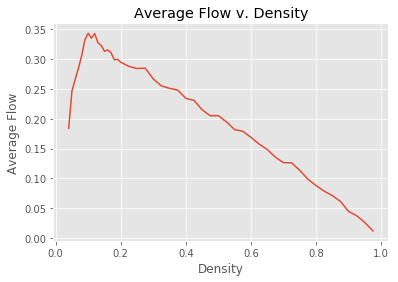

In [340]:
#In this cell, I create an average flow v. density plot 
# for the single lane traffic model

#I first average the results of each parameter
single_avg_result_list = []

avg_list = list(range(0,5100,100))
for x in avg_list:
    avg = []
    for y in range(100):
        avg.append(single_result[x+y][1])
    single_avg_result_list.append((single_result[x][0],np.mean(avg)))
    
# In this line, I take away the first 3 results from the averages list
# as we are not intersted in such low densities,
# with virtually no traffic jams.
trim_single_avg_result_list = single_avg_result_list[3:]
    
single_xs = [x[0] for x in trim_single_avg_result_list]
single_ys = [x[1] for x in trim_single_avg_result_list]

plt.style.use("ggplot")
plt.figure()
plt.xlabel('Density')
plt.ylabel('Average Flow')
plt.title('Average Flow v. Density')
plt.plot(single_xs, single_ys,)
plt.show()



In [410]:
# SECTION 2: TWO LANE MODEL
## Note that comments in this section explain changes from the previous model and do not repeat
## comments from the one lane model

class TrafficSimTwoLane(object):
    
    def __init__(self, road_length, traffic_density, maximum_velocity, prob_slow_down, prob_change_lanes, look_back = None, tracking = False):
        
        self.road_length = road_length
        self.traffic_density = traffic_density
        self.maximum_velocity = maximum_velocity
        self.prob_slow_down = prob_slow_down
        self.tracking = tracking
        self.tracking_counter = 0
        # the look back parameter is included, with a base case set to equal maximum velocity
        if look_back == None:
            self.look_back = self.maximum_velocity
        else: 
            self.look_back = look_back
        # The probability of changing lanes is included
        self.prob_change_lanes = prob_change_lanes
        

        #The array is now a list of length 2, with each element being a list of length road length
        array = [[-1]*self.road_length for x in range(2)]
        indexes = [[],[]]
        # The car position decision is now for 2 lanes
        counter = 0
        while len(indexes[0])+len(indexes[1])<2:
            if counter < 100:
                for x in range(self.road_length):
                    if random.random() < self.traffic_density: 
                        indexes[0].append(x)
                for x in range(self.road_length):
                    if random.random() < self.traffic_density: 
                        indexes[1].append(x)  
                counter +=1
            else:
                raise RuntimeError('Traffic density too low to execute meaningful simulation. Please increase it slightly.')           
  
        #Create the cars in both lanes
        for x in range(2):
            for index in indexes[x]:
                array[x][index] = 0
        self.state = np.array(array)
        
    def tracking_counter_plus_one(self):
        self.tracking_counter +=1
    
    def return_tracking_counter(self):
        return self.tracking_counter
        
        
    def update(self):
        
        # find the position of cars in both lanes
        cars0 = np.where(self.state[0] != -1)
        cars0 = cars0[0]
        cars1 = np.where(self.state[1] != -1)
        cars1 = cars1[0]
        cars = [list(cars0), list(cars1)]
        cars = np.array(cars)
        
        #LANE SWITCHES
        for y in range(len(cars)):
        # Y will refer to the lane that a car is in
            for x in range(len(cars[y])):
                
                car_index = cars[y][x]
                
                
                #Find the gap
                if len(cars[y]) == 1:
                    gap = self.road_length
                else:
                    gap = (cars[y][(x+1)%len(cars[y])] - car_index) %self.road_length
                
                #Find the gap_other and gap_other_back
                
                #other_lane is the opposite of y
                other_lane = (y+1)%len(cars)
                len_other_lane = len(cars[other_lane])
                #initialize the values for checks done later on
                gap_other = None
                gap_other_back = None
                
                #check if the other lane is empty
                if len_other_lane == 0:
                    gap_other = self.road_length
                    gap_other_back = self.road_length
                else:
                    #find all cars further along in the road than ours
                    cars_ahead_other = np.where(cars[other_lane] >= car_index)
                    
                    #If there are no cars further, the next car is the first car in other lane
                    if len(cars_ahead_other[0]) == 0:
                        gap_other = (cars[other_lane][0]-car_index) % self.road_length
                        
                    #Otherwise, the gap_other is the index of the closest car in other lane - car_index
                    else:
                        gap_other = (cars[other_lane][cars_ahead_other[0][0]]-car_index)
                        
                    # Now find the gap_other_back
                    # Check if gap_other is 0, if so gap_other_back is also zero
                    if gap_other == 0:
                        gap_other_back = 0 
                    else:
                        cars_behind_other = np.where(cars[other_lane] <= car_index)
                        #If there are no cars behind, the closest car is the last car in other lane
                        if len(cars_behind_other[0]) == 0:
                            gap_other_back = (car_index - cars[other_lane][-1]) % self.road_length
                        #Otherwise, the gap_other_back is cars_index - closest car back in other lane
                        else:
                            gap_other_back =  (car_index - cars[other_lane][cars_behind_other[0][-1]])
                
                
                #The next step is to run through all checks, and if all are true switch lanes
                check1,check2,check3,check4 = False,False,False,False
                #Check 1: Gap
                if gap < self.state[y][car_index] + 2:
                    check1 = True
                #Check 2: Gap_other
                if check1 and gap_other >= self.state[y][car_index] + 2:
                    check2 = True
                #Check 3: Gap_back
                if check2 and gap_other_back > self.look_back:
                    check3 = True
                #Check 4: Random
                if check3 and random.random() < self.prob_change_lanes:
                    check4 = True
                #If they all passed, then make the car change lanes
                #in both our cars array and our movement array
                if check4:
                    self.state[other_lane][car_index] = self.state[y][car_index]
                    self.state[y][car_index] = -1
        
        #INDIPENDENT UPDATES
        #reset the tracking counter outside of the for loop
        self.tracking_counter = 0
        
        # do the previous indipendent update process for each lane
        
        for y in range(len(self.state)):
            cars = np.where(self.state[y] != -1)
            cars = cars[0]
            movement_array = np.array([[x, self.state[y][x]] for x in cars])

            for x in range(len(cars)):
                car_index = cars[x]
                distance = (cars[(x+1)%len(cars)] - car_index) %self.road_length

                #accelerate 
                if self.state[y][car_index] < self.maximum_velocity and distance > self.state[y][car_index]+1:
                    movement_array[x][1] += 1
                #slow down
                elif self.state[y][car_index] >= distance :
                    movement_array[x][1] = distance-1
                #random slow down
                if random.random() < self.prob_slow_down:
                    if movement_array[x][1] > 0:
                        movement_array[x][1] -= 1

            transition_array = [-1]*self.road_length
            for x in movement_array:
                transition_array[(x[0]+x[1])%self.road_length] = x[1]
                self.state[y] = transition_array
            #Tracking procedure
            if self.tracking:
                for x in movement_array:
                    if x[0] + x[1] >= self.road_length:
                        self.tracking_counter_plus_one()              
        #Make the state an np array again
        self.state = np.array(self.state)                     
        
    # Display function adjusted for two lanes, printing an empty lane between each succesive update  
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state[0]))
        print(''.join('.' if x == -1 else str(x) for x in self.state[1]))
        print ('')



In [411]:
model = TrafficSimTwoLane(100,.3,5,.5,.5)
    
for _ in range(1000):
    model.update()
for _ in range(20):
    model.update()
    model.display()

0.00...2....10.00000.1.1.1.......2.1..2.1.....10.100.1...........3....4.......4....4......4..0.00..0
000000.00000.....1..20.00..00......3........10.00...0..10...1...2.......4........3.....4.......000.1

0.00.....2..0.100000.0.0..1......0..1.0...2...0.100.1..2............3.....4......3.....4....20.00..0
000000.00000......1.00.00..0.1.........4....0.10.1..0..0.1....2....3.........5......3.......5..000.0

0.00......1..1000000..1.1..1......1...0......30.00.1..2..2.............3.......5....3.....3.0.10.1.0
00000.10000.1.....0.00.0.1.0..1.......2....4.10.1.1..1..1.1......3.....4.........4.....3.....1.00.10

.10.1.......20000000..0...2..2......2..1.....00.00..1..1...2...............4......3.....4..1.10.1.10
00000.0000.1.1....0.00..1.10...1.........3..100.0...2.1..1.1........3.......5.........5....4..100.00

10.1.1......00000000...1...1....3.....2..2...00.0.1..1..1....2.................4......4..1.0.00..10.
00000.000.10...2..0.00..0.0.1...1.........1.000.0...0...20..1...........4........5.....

In [358]:
model = TrafficSimTwoLane(100,.5,5,.5,.5)
    
for _ in range(1000):
    model.update()
for _ in range(20):
    model.update()
    model.display()

00...1000.00..0.1.0000.0.1..0.0000.0.10.00..1.1..1.10..1000.0.1.00..1.00000.1..1000....2..2..10..10.
.00....00.0000.1000...2..1.1..0.10.0.1..1..2.1..0.1000.0.1....2...000..0.1..10.0.000.1.....000.....0

0.1..0000.00..0..1000.10..1..1000.1.10.100...1.1.0.0.1.0000.0.0.0.1..10000.1..2000.1.....2..200..00.
10.1...0.1000.10000.....2.1.1..10.10..1..1..1.1.0.0000.0..1.....2.00.1..1..20.10.000..1....00.1.....

.1.1.000.10.1.0..000.100...1.000.10.0.100.1..0.0..10..10000.0..10...200000...20000...2.....200.1.00.
0.1..2.0.000.10000.1.....10...200.0.1..1...2.10..10000.0....2....10.1.1...20.10.1000....2..00...2...

..1.100.100.0.0..00.1000....1000.0.1.1000..1..10..0.1.0000.1.1.0.1..00000.1..00000.....2...000.0.0.1
.1..2.10.000.00000..1....0.1..00.10..1...2..10.1.00000.0......2..0.10...2.0.100.000.1....1.00......3

1..100.100.1.1.1.0.1000.1...0000.0..10000....200..0..1000.1.10.0...20000.1..200000........3000..1.1.
...20.0.100.100000...1...0..1.0.100....2...200.0.0000.1.1.......2.100....1.1000.00.1..2

In [325]:
# I do the same process as with the single lane model, but with the two lane model

wrenexec = pywren.default_executor()

def pywren_func(x):
    return (x, simulation(x) )

def simulation( density ):
    sim_time = 100
    model = TrafficSimTwoLane(100,density,5,.5,.5,tracking = True)
    avg = []    
    for _ in list(range(1000)):
        model.update()
    for _ in list(range(sim_time)):
        model.update()
        avg.append(model.return_tracking_counter())
    return np.mean(avg)

low_density_range = [x/100.0 for x in range (1,20)]
high_density_range = [x/40.0 for x in range(8,40)]
density_range = low_density_range + high_density_range
density_100 = []
for x in density_range:
    for _ in range(100):
        density_100.append(x)

    
futures = wrenexec.map(pywren_func, density_100)
double_result = pywren.get_all_results(futures)

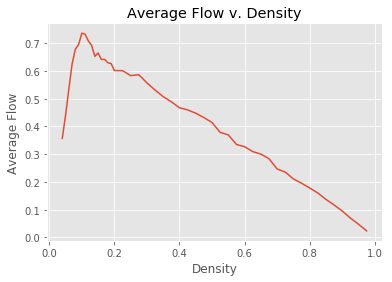

In [359]:
#I create a similar graph as before, but with the two lane model

double_avg_result_list = []

avg_list = list(range(0,5100,100))
for x in avg_list:
    avg = []
    for y in range(100):
        avg.append(double_result[x+y][1])
    double_avg_result_list.append((double_result[x][0],np.mean(avg)))
    
trim_double_avg_result_list = double_avg_result_list[3:]

    
double_xs = [x[0] for x in trim_double_avg_result_list]
double_ys = [x[1] for x in trim_double_avg_result_list]

plt.style.use("ggplot")
plt.figure()
plt.xlabel('Density')
plt.ylabel('Average Flow')
plt.title('Average Flow v. Density')
#plt.scatter(double_xs, double_ys)
plt.plot(double_xs, double_ys)
plt.show()

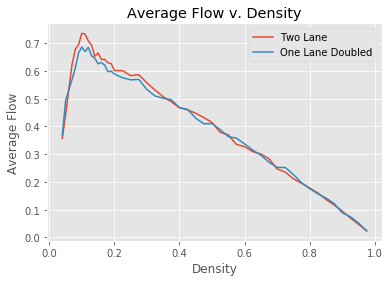

In [360]:
#To aid in comparison, I plotted the two lane model results
# with the single lane results doubled
single_ys_doubled = []
for y in single_ys:
    single_ys_doubled.append(y*2)
    
plt.style.use("ggplot")
plt.figure()
plt.xlabel('Density')
plt.ylabel('Average Flow')
plt.title('Average Flow v. Density')
plt.plot(double_xs, double_ys, label = "Two Lane")
plt.plot(double_xs, single_ys_doubled, label = "One Lane Doubled")
plt.legend()
plt.show()

In [550]:
## SECTION 3: DRIVER BEHAVIOUR

#In this section, I tackle the stretch goal of analyzing driver behaviour
# I run an AWS lambda simulation, with a parameter sweep of 2 parameters,
# the density and the look_back distance.
# Thus, I the output is how look_back distance affects
# traffic flow at all densities.

wrenexec = pywren.default_executor()

def pywren_func(x):
    return (x, simulation(x[0],x[1]))

def simulation( density , look_back ):
    sim_time = 100
    model = TrafficSimTwoLane(100,density,5,.5,.5,look_back = look_back, tracking = True)
    avg = []    
    for _ in list(range(1000)):
        model.update()
    for _ in list(range(sim_time)):
        model.update()
        avg.append(model.return_tracking_counter())
    return np.mean(avg)

input_list = []

density_range = [x/20.0 for x in range(1,20)]
look_back_list = [6,5,4,3,2,1,0]

#number of repeats changed to 50 b/c of AWS lambda restrictions
for x in density_range:
    for y in look_back_list:
        for _ in range(50):
            input_list.append([x,y])


    
futures = wrenexec.map(pywren_func, input_list)
data_3 = pywren.get_all_results(futures)

In [647]:
# The above cell was run three times,
# due to AWS lambda size restrictions.
# The outputs are 
# data_1, data_2, data_3
# which are each indipendently analyzed, 
# as well as their average.

In [659]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#In this cell, I create a function to graph the results from
# my parameters sweep in 3 dimensions,
# using matplotlibs 3d library.


def three_d_graph(data):

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    #Converting the data from 3d points into
    # 3 2d arrays for input
    full_sweep_avg = []
    repeats = 50
    avg_list = list(range(0,len(data),repeats))
    for x in avg_list:
        avg = []
        for y in range(repeats):
            avg.append(data[x+y][1])
        full_sweep_avg.append((data[x][0][0],data[x][0][1],np.mean(avg)))

    X = [[x]*7 for x in [x/20.0 for x in range(1,20)]]
    Y = [[6,5,4,3,2,1,0] for _ in range(19)]
    Z = [[full_sweep_avg[7*y+x][2] for x in range(7)]for y in range(19)]

    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)

    #plotting in three dimensions
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('Density')
    ax.set_ylabel('Look Back')
    ax.set_zlabel('Traffic Flow')
    ax.view_init(elev=10.)



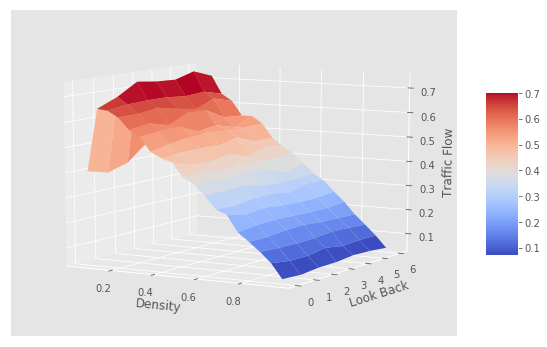

In [660]:
three_d_graph(data_1)

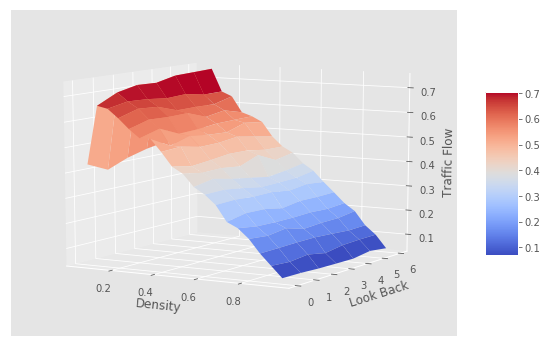

In [661]:
three_d_graph(data_2)

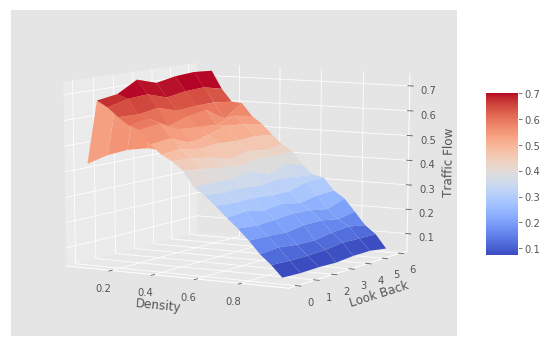

In [662]:
three_d_graph(data_3)

In [677]:
# a function to output the Z, the 2d array of traffic flow for each X, Y coordinate
def output_Z(data):
    full_sweep_avg = [] 
    repeats = 50
    avg_list = list(range(0,len(data),repeats))
    for x in avg_list:
        avg = []
        for y in range(repeats):
            avg.append(data[x+y][1])
        full_sweep_avg.append((data[x][0][0],data[x][0][1],np.mean(avg)))
    Z = [[full_sweep_avg[7*y+x][2] for x in range(7)]for y in range(19)]
    Z = np.array(Z)
    return Z
    
# A function to make the same graph but with averaged traffic flow from 3 Z arrays
def avg_Z_graph(Z1,Z2,Z3):
    
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    X = [[x]*7 for x in [y/20.0 for y in range(1,20)]]
    Y = [[6,5,4,3,2,1,0] for _ in range(19)]
    X = np.array(X)
    Y = np.array(Y)
    
    Z = [[0]*7 for _ in range(19)]
    for x in range(19):
        for y in range(7):
            Z[x][y]= np.mean([Z1[x][y],Z2[x][y],Z3[x][y]])
    Z= np.array(Z)
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('Density')
    ax.set_ylabel('Look Back')
    ax.set_zlabel('Traffic Flow')
    ax.view_init(elev=10.)
   

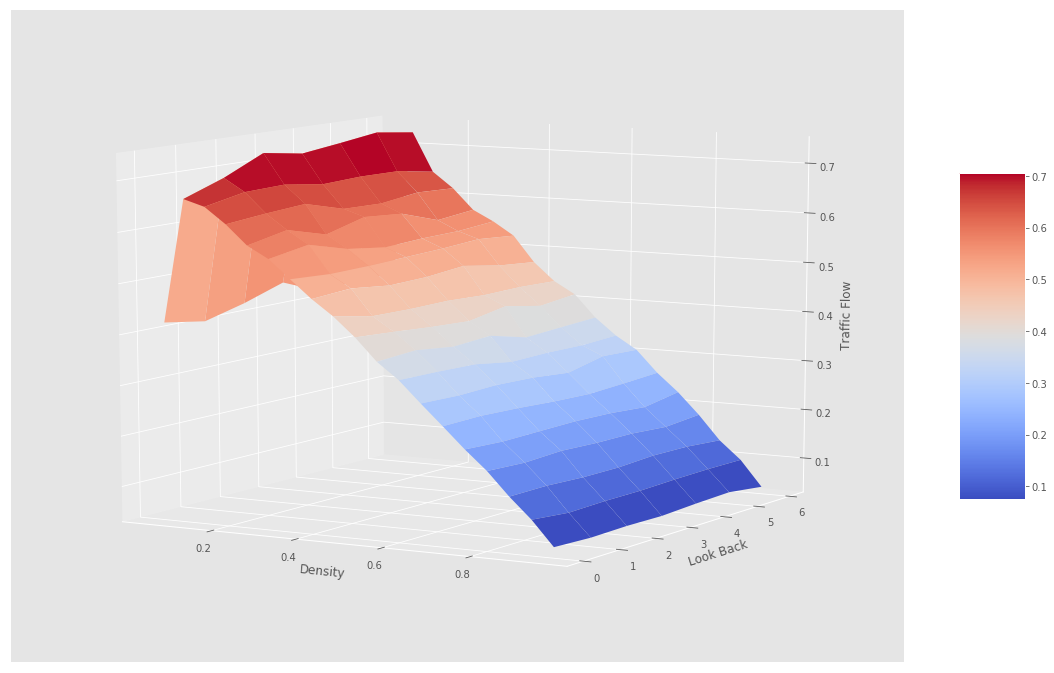

In [678]:
Z1 = output_Z(data_1)
Z2 = output_Z(data_2)
Z3 = output_Z(data_3)

avg_Z_graph(Z1,Z2,Z3)

In [643]:
#A function to average three Z arrays into one

def get_average_Z(Z1,Z2,Z3):
    Z = [[0]*7 for _ in range(19)]
    for x in range(19):
        for y in range(7):
            Z[x][y]= np.mean([Z1[x][y],Z2[x][y],Z3[x][y]])
    Z= np.array(Z)
    return Z

#This function plots the optimal look back (which produces the max. traffic flow )
# at each density
def plot_max(Z, Title):
    max_list = []
    # Z is 7 by 19
    for x in range(19):
        mx = max(Z[x])
        indx = np.where(Z[x]==mx)
        max_list.append(indx[0][0])
    
    xs = [y/20.0 for y in range(1,20)]
    
    plt.style.use("ggplot")
    plt.figure()
    plt.xlabel('Density')
    plt.ylabel('Optimal Look Back')
    plt.title(Title)
    plt.scatter(xs, max_list)
    plt.show()
    

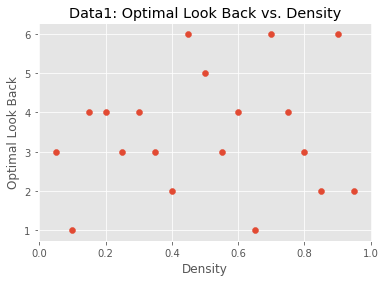

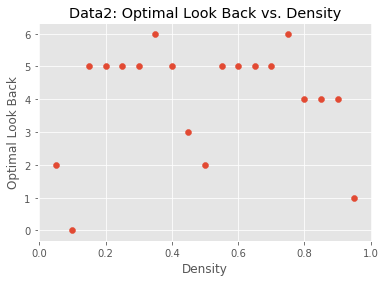

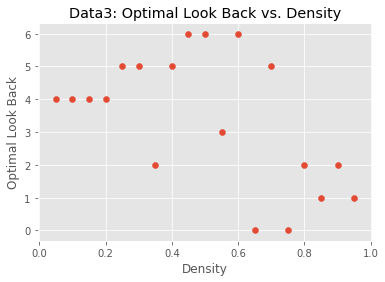

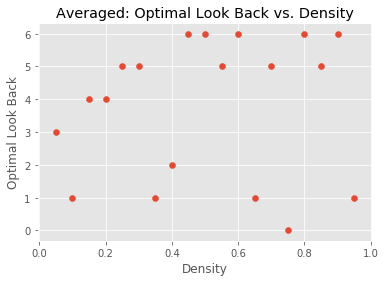

In [646]:
#This cell plot the max_plot for all 3 data outputs,
# as well as the averaged output

Z4 = get_average_Z(Z1,Z2,Z3)

plot_max(Z1, 'Data1: Optimal Look Back vs. Density')
plot_max(Z2, 'Data2: Optimal Look Back vs. Density')
plot_max(Z3, 'Data3: Optimal Look Back vs. Density')
plot_max(Z4, 'Averaged: Optimal Look Back vs. Density')


In [654]:
#The Final Lambda request was a parameter sweep
# with varying levels of p_slow_down.

wrenexec = pywren.default_executor()

def pywren_func(x):
    return (x, simulation(x[0],x[1]))

def simulation( density , p_slow_down ):
    sim_time = 100
    model = TrafficSimTwoLane(100,density,5,p_slow_down,.5, tracking = True)
    avg = []    
    for _ in list(range(1000)):
        model.update()
    for _ in list(range(sim_time)):
        model.update()
        avg.append(model.return_tracking_counter())
    return np.mean(avg)

input_list = []

density_range = [x/20.0 for x in range(1,20)]
#the p_slow_down range
p_slow_down = [x/10.0 for x in range(10)]

for x in density_range:
    for y in p_slow_down:
        #repeats down to 25
        for _ in range(25):
            input_list.append([x,y])


    
futures = wrenexec.map(pywren_func, input_list)
slow_down_output = pywren.get_all_results(futures)

In [671]:
#The graphing function adjusted for the size of data 
# from the p_slow_down output
def p_slow_down_graph(data):

    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    #Converting the data from 3d points into
    # 3 2d arrays for input
    full_sweep_avg = []
    repeats = 25
    avg_list = list(range(0,len(data),repeats))
    for x in avg_list:
        avg = []
        for y in range(repeats):
            avg.append(data[x+y][1])
        full_sweep_avg.append((data[x][0][0],data[x][0][1],np.mean(avg)))

    X = [[x]*10 for x in [x/20.0 for x in range(1,20)]]
    Y = [[x/10.0 for x in range(10)] for _ in range(19)]
    Z = [[full_sweep_avg[10*y+x][2] for x in range(10)]for y in range(19)]

    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)

    #plotting in three dimensions
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('Density')
    ax.set_ylabel('Probability of Slowing Down')
    ax.set_zlabel('Traffic Flow')
    ax.view_init(elev=10., azim = 70)

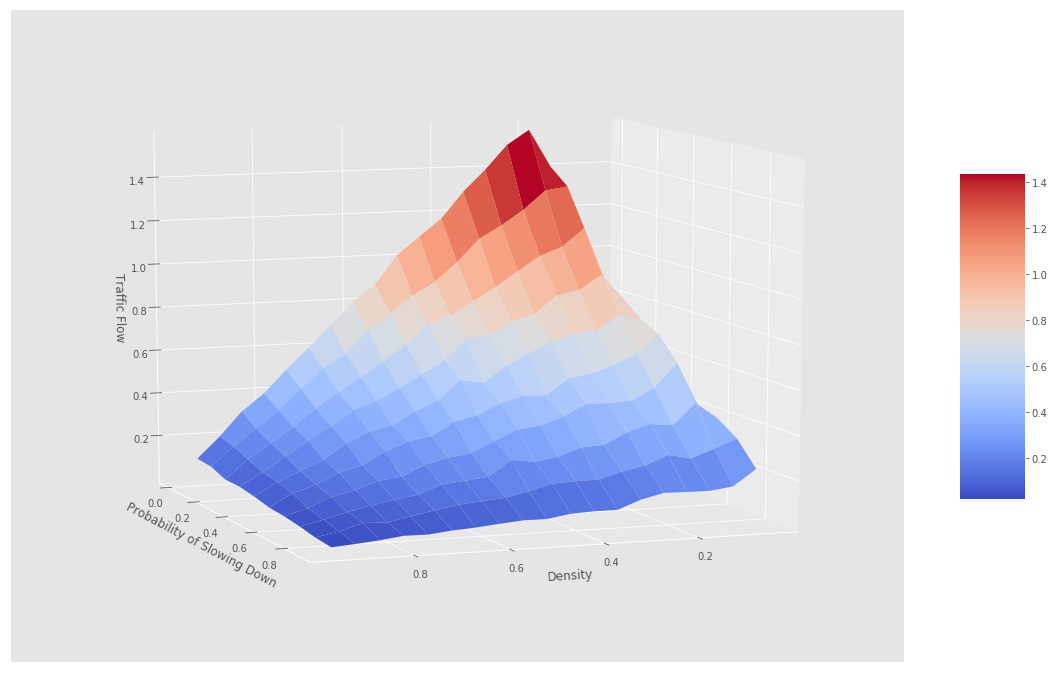

In [672]:
#The graph of the outputs
p_slow_down_graph(slow_down_output)